In [162]:
%matplotlib inline 
from pycocotools.coco import COCO
import numpy as np 
import skimage.io as io 
import matplotlib.pyplot as plt
import pylab
import os
from PIL import Image, ExifTags
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [76]:
import random

def get_random_element(my_list):
    if len(my_list) == 0:
        return None
    else:
        return random.choice(my_list)

In [143]:
dataDir = "./data"
annFile = "{}/swapped_annotations.json".format(dataDir)

In [144]:
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.20s)
creating index...
index created!


In [145]:
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
print('COCO categories: \n {}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n {}'.format(' '.join(nms)))

COCO categories: 
 Other Bottle Bottle cap Can Cup Lid Plastic bag + wrapper Pop tab Straw Cigarette

COCO supercategories: 
 Litter


In [153]:
catIds = coco.getCatIds(catNms=['Bottle']); 
imgIds = coco.getImgIds(catIds=catIds); 
print(imgIds)
randomImg = get_random_element(imgIds)
img = coco.loadImgs(randomImg)[0]

[0, 2, 3, 5, 7, 8, 10, 12, 13, 14, 15, 23, 25, 26, 27, 28, 36, 37, 39, 40, 43, 60, 75, 76, 84, 89, 99, 101, 102, 103, 104, 106, 111, 112, 113, 114, 115, 116, 122, 124, 130, 148, 176, 182, 187, 188, 192, 194, 198, 220, 222, 227, 229, 235, 237, 271, 276, 291, 295, 296, 299, 300, 301, 313, 314, 320, 322, 325, 330, 334, 335, 339, 344, 346, 348, 358, 360, 362, 369, 380, 385, 389, 391, 394, 395, 410, 414, 427, 429, 435, 437, 440, 443, 444, 460, 468, 487, 493, 494, 496, 507, 508, 514, 516, 520, 522, 524, 526, 538, 539, 540, 543, 549, 578, 580, 582, 595, 597, 604, 605, 616, 618, 619, 620, 650, 651, 654, 657, 658, 663, 672, 673, 679, 685, 686, 687, 700, 701, 706, 707, 714, 716, 717, 724, 729, 751, 753, 755, 758, 764, 765, 782, 783, 784, 789, 793, 794, 803, 830, 840, 849, 853, 855, 860, 866, 875, 962, 964, 965, 974, 975, 995, 996, 999, 1000, 1008, 1010, 1013, 1019, 1022, 1025, 1044, 1045, 1063, 1067, 1077, 1078, 1079, 1080, 1081, 1082, 1084, 1088, 1091, 1094, 1096, 1097, 1099, 1101, 1102, 1103, 

## EXIF 

There are certain info encoded in the image that determine orientation of the image. 

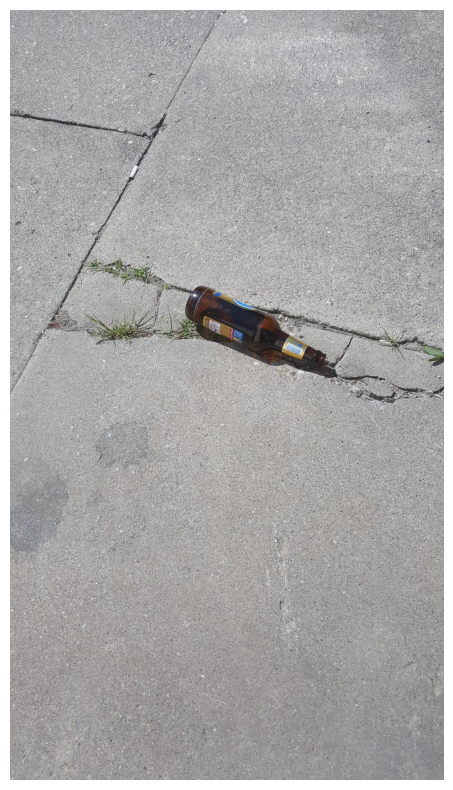

In [167]:
# load and display image 
I = Image.open("{}/{}".format(dataDir, img['file_name']))

# Obtain Exif orientation tag code
for orientation in ExifTags.TAGS.keys():
    if ExifTags.TAGS[orientation] == 'Orientation':
        break
        
 # Load and process image metadata
if I._getexif():
    exif = dict(I._getexif().items())
    # Rotate portrait and upside down images if necessary
    if orientation in exif:
        if exif[orientation] == 3:
            I = I.rotate(180,expand=True)
        if exif[orientation] == 6:
            I = I.rotate(270,expand=True)
        if exif[orientation] == 8:
            I = I.rotate(90,expand=True)

plt.axis('off')
plt.imshow(I)
plt.show()

{'id': 917, 'image_id': 299, 'category_id': 1, 'segmentation': [[1370.0, 1913.0, 1795.0, 2107.0, 1833.0, 2136.0, 1849.0, 2164.0, 1873.0, 2212.0, 2110.0, 2346.0, 2128.0, 2344.0, 2160.0, 2374.0, 2172.0, 2372.0, 2181.0, 2391.0, 2161.0, 2433.0, 2131.0, 2464.0, 2124.0, 2453.0, 2097.0, 2452.0, 2074.0, 2443.0, 2049.0, 2428.0, 1819.0, 2347.0, 1771.0, 2353.0, 1708.0, 2361.0, 1674.0, 2351.0, 1504.0, 2270.0, 1254.0, 2149.0, 1217.0, 2122.0, 1204.0, 2082.0, 1213.0, 2028.0, 1242.0, 1964.0, 1272.0, 1920.0, 1311.0, 1899.0]], 'area': 213248.5, 'bbox': [1204.0, 1899.0, 977.0, 565.0], 'iscrowd': 0}


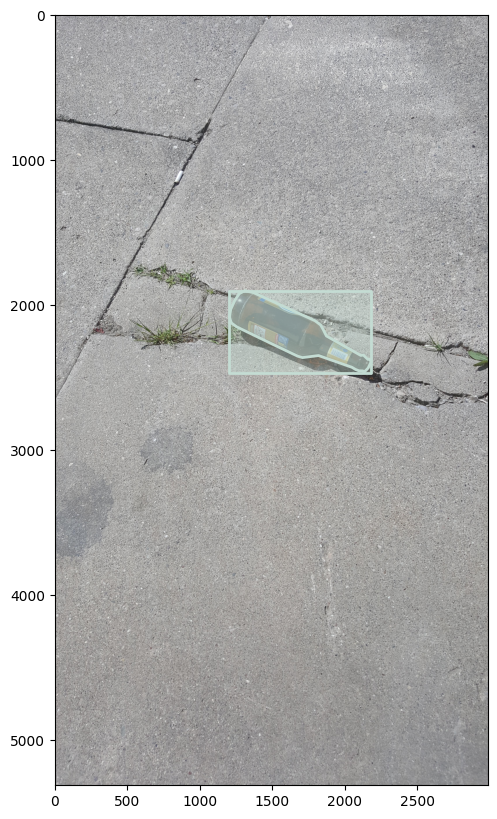

In [168]:
# Load and display instance annotations 
plt.imshow(I); 
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds) 
print(anns[0])
coco.showAnns(anns, True) 

In [158]:
img['file_name']

'batch_11/000098.jpg'

## Linux Cmd

In [4]:
ls

coco_trans/        demo.ipynb   explore_dataset.ipynb  rename_lowercase.sh*
data/              detector/    LICENSE                requirements.txt
data_transformed/  download.py  README.md              taco.tar.gz
